In [ ]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Evaluating Classifiers
Throughout these exercises, you will implement and design evaluation metrics for classification models. The metrics used are provided by the scikit-learn library. The default metric for evaluating a classification model is `accuracy`
, but Scikit-learn also has a `metrics`
 module that provides a variety of metrics serving different purposes.
The cell below imports the necessary libraries and sets the default parameters.

**Info**
Your main focus is to evaluate classification models so you don't need to concern yourself with the intricacies of the actual models.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, auc, average_precision_score, roc_curve
from sklearn.svm import SVC, LinearSVC
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings("ignore")

## Classification Metrics:
Run the cell below to generate a classification dataset comprising of 500 samples, 20 features, and 2 distinct classes. This dataset is partitioned using an 80-20 train-test split.


In [2]:
X,Y  = datasets.make_classification(n_samples=500, n_features=20, n_classes=2, random_state=1)
print('Dataset Size : ',X.shape,Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, stratify=Y, random_state=1)
print('Train/Test Size : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Dataset Size :  (500, 20) (500,)
Train/Test Size :  (400, 20) (100, 20) (400,) (100,)


### Classification Accuracy
In the following task you will evaluate the model's performance on the test data using different metrics. Run the cell below to train the first classification model. 


In [3]:
classifier1 = LinearSVC(random_state=1, C=0.1)
classifier1.fit(X_train, Y_train)

LinearSVC(C=0.1, random_state=1)


---
**Task 1 (easy): Model accuracy👩‍💻**
Classification accuracy is the number of true predictions divided by the total number of samples. You can use the `score`
 function to obtain the accuracy, or you can use the `predict`
 function on either set and then calculate the average accuracy by comparing the predicted labels to the true labels. Choose one of these methods to: 
1. Calculate model accuracy on the training set.
2. Calculate model accuracy on the testing set.
3. Construct and plot a confusion matrix of the model predictions on the testing set. 


**Info**
Recall that the confusion matrix for binary classification problems has the following structure:

$$
\begin{array}{cc|c|c|}
  & & \text{Predicted Negative} & \text{Predicted Positive} \\
\hline
\text{Actual Negative} & & TN & FP \\
\hline
\text{Actual Positive} & & FN & TP \\
\end{array}
$$
- **TN** - True Negative
- **FN** - False Negative 
- **FP** - False positive
- **TP** - True Positive



---

Training Accuracy:  0.5425
Test Accuracy:  0.545


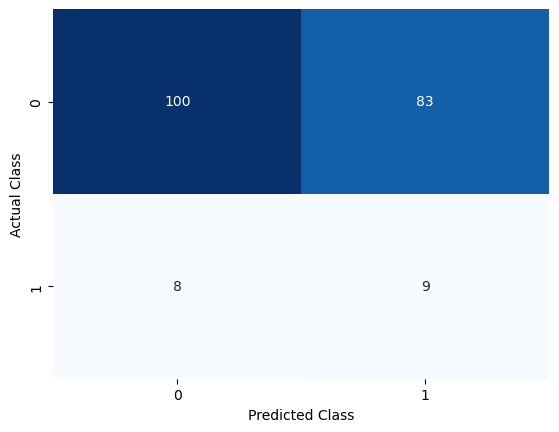

In [51]:
# write your code here
train_accuracy = classifier1.score(X_train, Y_train)
test_accuracy = classifier1.score(X_test, Y_test)

print("Training Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

def get_conf_matrix(classifier, input, target):
    res = classifier.predict(input)

    false_pred_res = [0,0]
    true_pred_res = [0,0]
    for i in range(len(res)):
        actual = target[i]
        pred = res[i]

        if pred:
            if actual:
                true_pred_res[1] += 1
            else:
                false_pred_res[1] += 1
        else:
            if actual:
                true_pred_res[0] += 1
            else:
                false_pred_res[0] += 1
    
    return np.array([false_pred_res, 
                     true_pred_res])

conf_mat = get_conf_matrix(classifier1, X_test, Y_test)

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

### Classification Report
The classification report provides a more detailed overview of the model's classification performance. It includes metrics such as precision, recall, f1-score, and specificity.
- **Precision** - or positive predictive value, represents how many predictions of the positive class actually belong to that class. 

$$
\frac{𝑇𝑃}{𝑇𝑃+𝐹𝑃}
$$


- **Recall** -  also known as sensitivity, true positive rate, or hit rate and assesses whether classifier correctly identifies positive instances out of the total actual postive instances. 

$$
\frac{𝑇𝑃}{𝑇𝑃+𝐹𝑁} 
$$


- **F1-score** - harmonic mean of precision & recall. 

$$
2∗\frac{𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛∗𝑟𝑒𝑐𝑎𝑙𝑙}{𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛+𝑟𝑒𝑐𝑎𝑙𝑙} 
$$


- **Specificity** - also known as the True Negative Rate, is the percentage of correctly predicted instances of the negative class 

$$
\frac{TN}{TN+FP} 
$$




---
**Task 2 (easy): Classification report👩‍💻💡**
1. Use the confusion matrix from Task 1 to obtain the true positive, false positive, true negative and false negative values. 

2. Use the obtained values to implement the above formulas and calculate:


- Precision
- Recall
- F1-score
- Specificity

3. Inspect the metrics and reflect on theier significance, especially when dealing with class imbalance in your dataset. How do these metrics help in understanding and evaluating the performance of a classification model in situations where one class significantly outnumbers the other?


---

In [10]:
# Task 1 - Get confusion matrix of the test result
def get_metrics(classifier, X, y):
    conf_mat = get_conf_matrix(classifier, X, y)

    # Task 2 - Calculate the classification report
    fp = conf_mat[0, 1] # False positive    - Predicted true, but was actually false
    tn = conf_mat[0, 0] # True negative     - Predicted false, which is correct
    fn = conf_mat[1, 0] # False negative    - Predicted false, but was actually true
    tp = conf_mat[1, 1] # True Positive     - Predicted true, which is correct

    precision = tp/(tp+fp)
    recall    = tp/(tp+fn)
    f1_score  = 2 * ((precision * recall) / (precision + recall))
    specificity = tn/(tn+fp)

    return precision, recall, f1_score, specificity

precision, recall, f1_score, specificity = get_metrics(classifier1, X_test, Y_test)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1_score)
print("Specificity: ", specificity)

Precision:  0.9387755102040817
Recall:  0.92
F1-score:  0.9292929292929293
Specificity:  0.94


## Imbalanced classes
We will generate a new dataset comprising 1000 samples distributed across 10 classes, but we intentionally create an imbalance. In the cell below, the imbalance is created by marking all samples belonging to the positive class (0) as True, and all the remaining classes as False. As a result, 10% of values belong to the positive class and the remaining 90% to the negative class.


In [11]:
X, Y = datasets.make_classification(n_samples=1000, n_classes=10, n_informative=10)

# Mark the minority class as True
Y = (Y == 0).astype(int)

print('Dataset Size:', X.shape, Y.shape)

# Check the imbalance ratio
imbalance_ratio_actual = np.mean(Y)
print(f'Imbalance Ratio (Positive/Minority Class): {imbalance_ratio_actual:.2f}')

Dataset Size: (1000, 20) (1000,)
Imbalance Ratio (Positive/Minority Class): 0.10



---
**Task 3 (hard): Class Imbalance👩‍💻💡**
Throughout the following task you will implement and evaluate a second classifier on the imbalanced dataset:
1. The for loop below performs the data splitting for 5-fold cross-validation. Complete the loop to: 

- Fit the second classification model on the training folds 
- Predict the labels on the validation folds
- Calculate model accuracy on the validation folds

2. Plot the accuracy of the model on each fold. What does the plot tell you about classification performance?
3. Extend your loop to obtain the classification report on the testing set (precision, recall, F1-Score, specificity). Print the average of each metric (use `np.nanmean()`
 as some of these metrics might inlcude NaNs)


**Hint**
First construct the confusion matrix.

4. Is the model able to reliably identify the minority class? What are the implications for the model's performance and its practical utility?
5. (Optional) Plot all the metrics in the same plot. 


---

**Anwers**
4. No the model is not able to reliably indentify the minority class. (I am not sure about the last part yet)

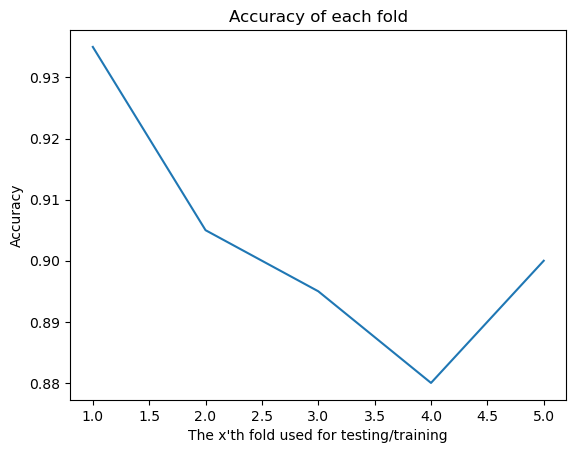

Mean Accuracy:  0.9030000000000001
Mean Precision:  1.0
Mean Recall:  0.009523809523809523
Mean F1-score:  0.0909090909090909
Mean Specificity:  1.0


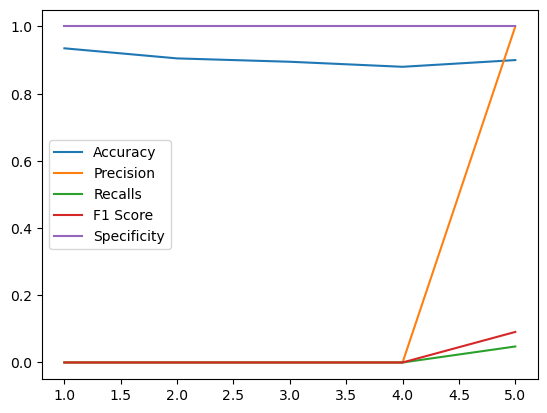

In [67]:
classifier2 = SVC()

accuracies= []
accuracies, precisions, recalls, f1_scores, specificities = [], [], [], [], []

for train_idx_svc, test_idx_svc in KFold(n_splits=5, shuffle=True).split(X):
    X_train, X_test = X[train_idx_svc], X[test_idx_svc]
    Y_train, Y_test = Y[train_idx_svc], Y[test_idx_svc]

    # Task 1
    classifier2.fit(X_train, Y_train)
    acc = classifier2.score(X_test, Y_test)
    prec, rec, f1, spec = get_metrics(classifier2, X_test, Y_test)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    specificities.append(spec)

n_folds = [i for i in range(1, 6)]
plt.plot(n_folds, accuracies)
plt.title("Accuracy of each fold")
plt.xlabel("The x'th fold used for testing/training")
plt.ylabel("Accuracy")
plt.show()

print("Mean Accuracy: ", np.nanmean(accuracies))
print("Mean Precision: ", np.nanmean(precisions))
print("Mean Recall: ", np.nanmean(recalls))
print("Mean F1-score: ", np.nanmean(f1_scores))
print("Mean Specificity: ", np.nanmean(specificities))

fig, ax = plt.subplots()
ax.plot(n_folds, np.nan_to_num(accuracies), label="Accuracy")
ax.plot(n_folds, np.nan_to_num(precisions), label="Precision")
ax.plot(n_folds, np.nan_to_num(recalls), label="Recalls")
ax.plot(n_folds, np.nan_to_num(f1_scores), label="F1 Score")
ax.plot(n_folds, np.nan_to_num(specificities), label="Specificity")
ax.legend()


## ROC Curves and Precision-Recall Curves
The ROC (Receiver Operating Characteristic) Curve is a valuable tool for assessing model performance, particularly in binary classification tasks. The Precision-Recall Curve is a graphical representation used to evaluate the performance of a classification model, particularly in situations involving class imbalance or when the positive class is of greater interest. 
In the following task you will examine the ROC curve and the Precision-Recall curve for the second classifier, which you previously trained on the imbalanced dataset. 

---
**Task 4 (medium): ROC and Precision-Recall curves👩‍💻💡**
Run the cell below to ensure that the appropriate proportions of the imbalanced dataset are allocated to the training and testing sets, respectively. The provided code also calculates both the ROC (Receiver Operating Characteristic) curve and the Precision-Recall curve and computes relevant metrics. These metrics include: `fpr`
 (False Positive Rate), `tpr`
 (True Positive Rate, also known as `recall`
), and `precision`
.
Complete the code to:
1. Plot the ROC curve.
2. Plot the Precision-Recall curve.
3. How do these scores provide insights into a model's ability to handle class imbalance? 
4. Describe when and why you would prioritize one curve over the other when dealing with imbalanced data.


---

In [ ]:
X_train, X_test = X[train_idx_svc], X[test_idx_svc]
Y_train, Y_test = Y[train_idx_svc], Y[test_idx_svc]

# ROC curve
decision_function = classifier2.decision_function(X_test)
fpr, tpr, _ = roc_curve(Y_test, decision_function)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y_test, decision_function)
pr_auc = average_precision_score(Y_test, decision_function)

# write your solution here